# Stock Market Analysis

In this project, I will analyse stock market data for some technology stocks using Python. In particular, I will leverage various Python libraries (such as pandas, numpy, matplotlib and seaborn) to get stock data, create visualizations, analyze the risk of a stock based on its historical performance, and predict future stock prices through the Monte Carlo method.

I'll try to answer the following questions:

    1.) What was the historical price changes for the stocks?
    2.) What was the average daily return for the stocks?
    3.) What was the moving average for the stocks?
    4.) What was the correlation between the stocks' (i) closing prices and (ii) daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

## Section 1: Basic Analysis of Stock Information

This sections include how to handle stock information with pandas, and how to do basic analysis of a stock's historical price and volume development.

### Preparation - download and import all required libraries

First, let’s import our required dependencies.

In [90]:
#For data analysis
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#display graphs directly below the code cell that produced it
%matplotlib inline

# For stock data import
#conda install -c anaconda pandas-datareader #uncomment this line if you haven't installed pandas datareader
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# Required for Python version 2.x, will change the / operator to mean true division as implemented in Python 3.0.
#from __future__ import division #uncomment this line if you run Python 2.x

### Download and Explore Dataset

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [109]:
# A list of the ticker symbols for the stocks I'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end_date = datetime.now()
start_date = datetime(end_date.year - 1,month=1, day=1)

print(start_date)
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start_date,end_date)

2019-01-01 00:00:00


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's have a quick look at the AAPL DataFrame

In [110]:
AAPL.head().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.71,38.56,38.72,39.48,148158800.0,38.25
2019-01-03,36.43,35.50,35.99,35.55,365248800.0,34.44
2019-01-04,37.14,35.95,36.13,37.06,234428400.0,35.91
2019-01-07,37.21,36.47,37.17,36.98,219111200.0,35.83
2019-01-08,37.96,37.13,37.39,37.69,164101200.0,36.51


The adjusted closing price ("__Adj Close__") amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance (Source: https://www.investopedia.com/terms/a/adjusted_closing_price.asp).

Let's apply the __describe__ function to get some basic statistical details like percentiles, mean, std etc.

In [111]:
# Summary statistics
AAPL.describe().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close
count,482.00,482.00,482.00,482.00,4.820000e+02,482.00
mean,72.04,70.27,71.13,71.21,1.320350e+08,70.33
std,25.72,24.77,25.34,25.24,6.576006e+07,25.61
min,36.43,35.50,35.99,35.55,2.045080e+07,34.44
25%,50.95,50.13,50.47,50.65,8.914620e+07,49.37
50%,66.33,65.19,65.66,65.64,1.151187e+08,64.62
75%,85.65,82.71,82.92,83.82,1.560168e+08,83.53
max,137.98,130.53,137.59,134.18,4.268848e+08,133.95


In [112]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 482 entries, 2019-01-02 to 2020-11-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       482 non-null    float64
 1   Low        482 non-null    float64
 2   Open       482 non-null    float64
 3   Close      482 non-null    float64
 4   Volume     482 non-null    float64
 5   Adj Close  482 non-null    float64
dtypes: float64(6)
memory usage: 26.4 KB


### Plot out the volume and closing price

Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

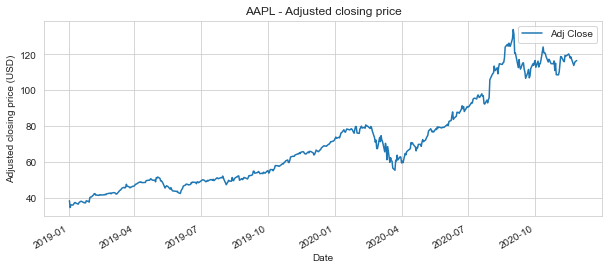

In [113]:
# Let's see a historical view of the closing price
AAPL_adj_close = AAPL['Adj Close'].plot(legend=True,figsize=(10,4),title="AAPL - Adjusted closing price")

# Add appropriate axis labels
AAPL_adj_close.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

Now that we've seen the development of the adjusted closing price, let's plot the Daily volume (i.e. how many shares are traded each day).

[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Date')]

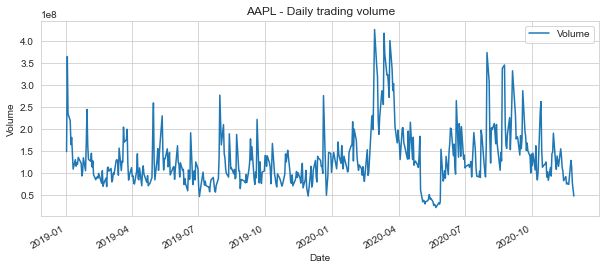

In [114]:
# Now let's plot the daily volume, i.e. how many AAPL shares are traded each day
AAPL_vol = AAPL['Volume'].plot(legend=True,figsize=(10,4),title="AAPL - Daily trading volume")

# Add appropriate axis labels
AAPL_vol.set(xlabel="Date", ylabel="Volume")

The Daily volume can be averaged over a number of days (typically over 20 or 30 days) to find the average daily trading volume (ADTV), i.e. the average number of shares traded within a day in a given stock. ADTV is an important metric because high or low trading volume attracts different types of traders and investors. Many traders and investors prefer higher ADTV compared to low trading volume, because with high volume it is easier to get into and out positions. Low volume assets have fewer buyers and sellers, and therefore it may be harder to enter or exit at a desired price (Source: https://www.investopedia.com/terms/a/averagedailytradingvolume.asp).

In [115]:
# Let's add a 30 days Average Daily Trading Volume metric
AAPL['ADTV'] = AAPL['Volume'].rolling(window=30,center=False).mean()
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV
Date,,,,,,,
2020-11-20,118.77,117.29,118.64,117.34,73391400.0,117.34,1.224680e+08
2020-11-23,117.62,113.75,117.18,113.85,127959300.0,113.85,1.187257e+08
2020-11-24,115.85,112.59,113.91,115.17,113874200.0,115.17,1.137772e+08
2020-11-25,116.75,115.17,115.55,116.03,76499200.0,116.03,1.112918e+08
2020-11-27,117.49,116.22,116.57,116.59,46691300.0,116.59,1.090962e+08


[Text(0, 0.5, 'Volume'), Text(0.5, 0, 'Date')]

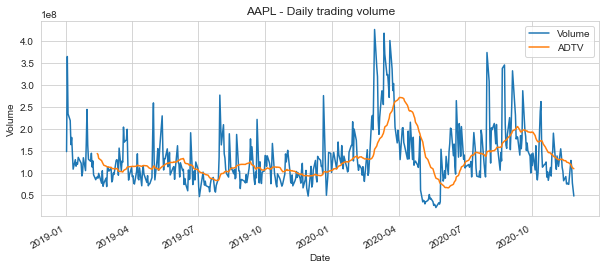

In [116]:
# Now let's plot the daily volume, i.e. how many AAPL shares are traded each day
AAPL_vol_avg = AAPL[['Volume','ADTV']].plot(legend=True,figsize=(10,4),title="AAPL - Daily trading volume")

# Add appropriate axis labels
AAPL_vol_avg.set(xlabel="Date", ylabel="Volume")

### Moving Average

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

* A moving average (MA) is a stock indicator that is commonly used in technical analysis.
* The reason for calculating the moving average of a stock is to help smooth out the price data (i.e. by filtering out the “noise” from random short-term price fluctuations) over a specified period of time by creating a constantly updated average price.
* MAs can be constructed in several different ways, and employ different numbers of days for the averaging interval. The most common time periods used in moving averages are 15, 20, 30, 50, 100, and 200 days. The shorter the time span used to create the average, the more sensitive it will be to price changes. The longer the time span, the less sensitive the average will be. The 50-day and 200-day moving average figures for stocks are widely followed by investors and traders and are considered to be important trading signals.
* The most common applications of MAs are to identify trend direction and to determine support and resistance levels. When asset prices cross over their MAs, it may generate a trading signal for technical traders
* A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.
* Exponential moving averages (EMA) is a weighted average that gives greater importance to the price of a stock on more recent days, making it an indicator that is more responsive to new information. If you plot a 50-day SMA and a 50-day EMA on the same chart, you'll notice that the EMA reacts more quickly to price changes than the SMA does, due to the additional weighting on recent price data.

Sources:
* https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
* http://www.investopedia.com/terms/m/movingaverage.asp

#### Simple moving average (SMA)

In [117]:
# Let's go ahead and plot out several moving averages
ma_day = [20,50,200]

for ma in ma_day:
    column_name = "%s-days SMA" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [118]:
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV,20-days SMA,50-days SMA,200-days SMA
Date,,,,,,,,,,
2020-11-20,118.77,117.29,118.64,117.34,73391400.0,117.34,1.224680e+08,116.06,115.28,93.06
2020-11-23,117.62,113.75,117.18,113.85,127959300.0,113.85,1.187257e+08,116.01,115.25,93.23
2020-11-24,115.85,112.59,113.91,115.17,113874200.0,115.17,1.137772e+08,115.94,115.25,93.41
2020-11-25,116.75,115.17,115.55,116.03,76499200.0,116.03,1.112918e+08,116.19,115.33,93.59
2020-11-27,117.49,116.22,116.57,116.59,46691300.0,116.59,1.090962e+08,116.27,115.46,93.77


Now let's go ahead and plot all the additional Moving Averages

[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

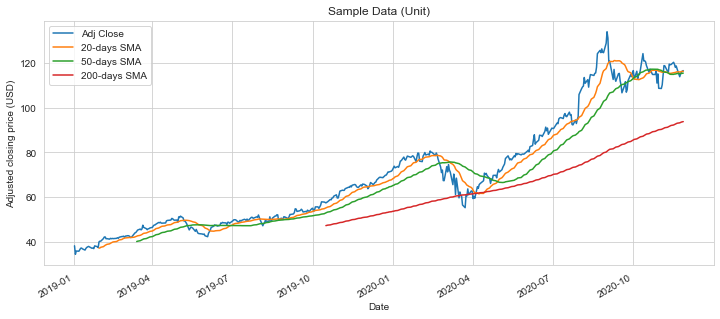

In [119]:
ax = AAPL[['Adj Close','20-days SMA','50-days SMA','200-days SMA']].plot(subplots=False,figsize=(12,5),title="Sample Data (Unit)")
ax.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries. However, this comes at a cost. SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days.

How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly M/2 days. Thus, if we are using a 100 days SMA, this means we may be late by almost 50 days, which can significantly affect our strategy.

#### Exponential Moving Average (EMA)

One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA). The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by 1/M. Using Pandas, calculating the exponential moving average is easy. We need to provide a lag value, from which the decay parameter α is automatically calculated.

In [131]:
# Let's go ahead and plot out several moving averages
# Span (i.e. the length of the window) corresponds to what is commonly called an “N-day EW moving average”.
AAPL['20-days EMA'] = AAPL['Adj Close'].ewm(span=20, adjust=False).mean()
AAPL.tail().round(decimals=2)

,High,Low,Open,Close,Volume,Adj Close,ADTV,20-days SMA,50-days SMA,200-days SMA,20-days EMA,Daily Return
Date,,,,,,,,,,,,
2020-11-20,118.77,117.29,118.64,117.34,73391400.0,117.34,1.224680e+08,116.06,115.28,93.06,117.19,-0.01
2020-11-23,117.62,113.75,117.18,113.85,127959300.0,113.85,1.187257e+08,116.01,115.25,93.23,116.87,-0.03
2020-11-24,115.85,112.59,113.91,115.17,113874200.0,115.17,1.137772e+08,115.94,115.25,93.41,116.71,0.01
2020-11-25,116.75,115.17,115.55,116.03,76499200.0,116.03,1.112918e+08,116.19,115.33,93.59,116.64,0.01
2020-11-27,117.49,116.22,116.57,116.59,46691300.0,116.59,1.090962e+08,116.27,115.46,93.77,116.64,0.00


[Text(0, 0.5, 'Adjusted closing price (USD)'), Text(0.5, 0, 'Date')]

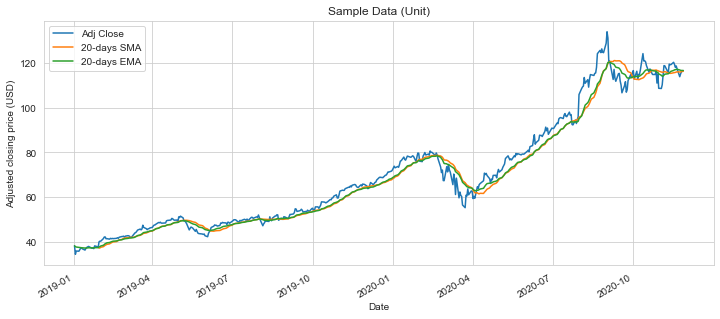

In [122]:
ax = AAPL[['Adj Close','20-days SMA','20-days EMA']].plot(subplots=False,figsize=(12,5),title="Sample Data (Unit)")
ax.set(xlabel="Date", ylabel="Adjusted closing price (USD)")

In the graph above, the number of time periods used in each average is identical–20–but the EMA responds more quickly to the changing prices than the SMA. You can also observe in the figure that the EMA has a higher value when the price is rising than the SMA (and it falls faster than the SMA when the price is declining). This responsiveness to price changes is the main reason why some traders prefer to use the EMA over the SMA (source: http://www.investopedia.com/terms/m/movingaverage.asp).

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [133]:
# The daily return column can be created by using the percentage change for the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].head()

Date
2019-01-02         NaN
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
Name: Daily Return, dtype: float64

[Text(0, 0.5, 'Daily percentage change'), Text(0.5, 0, 'Date')]

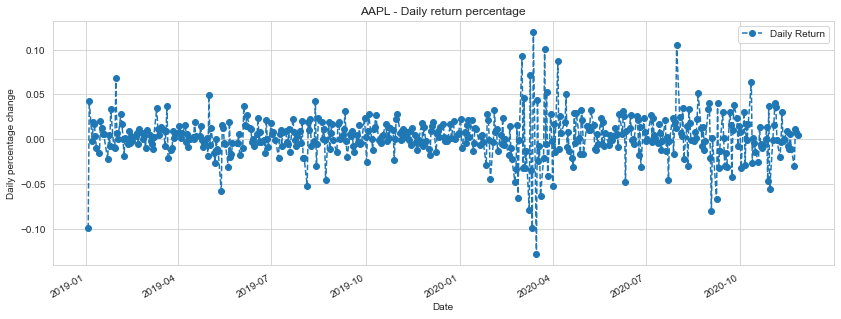

In [141]:
# Then we'll plot the daily return percentage
ax = AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o',title="AAPL - Daily return percentage")
ax.set(xlabel='Date', ylabel='Daily percentage change')

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kernel density estimate (KDE) plot on the same figure. A KDE plot is a method for visualizing the distribution of observations in a dataset. KDE represents the data using a continuous probability density curve in one or more dimensions.

[Text(0, 0.5, '# of observations'),
 Text(0.5, 0, 'Daily return'),
 Text(0.5, 1.0, 'AAPL - Daily return distribution')]

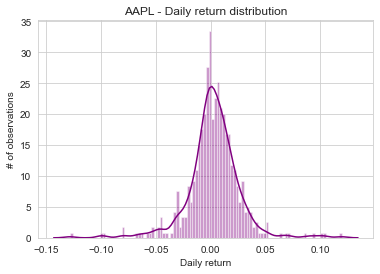

In [144]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
ax = sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
              
ax.set(xlabel='Daily return', ylabel='# of observations',title="AAPL - Daily return distribution")

# Could have also done:
#AAPL['Daily Return'].hist()

Positive daily returns seem to be slightly more frequent than negative returns for Apple, which makes sense given the historical development of the closing price.

#### Comparison between the stocks

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [146]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start_date,end_date)['Adj Close']

In [148]:
# Let's take a quick look
closing_df.head().round(decimals=2)

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,38.25,1045.85,98.60,1539.13
2019-01-03,34.44,1016.06,94.97,1500.28
2019-01-04,35.91,1070.71,99.39,1575.39
2019-01-07,35.83,1068.39,99.52,1629.51
2019-01-08,36.51,1076.28,100.24,1656.58


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [149]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

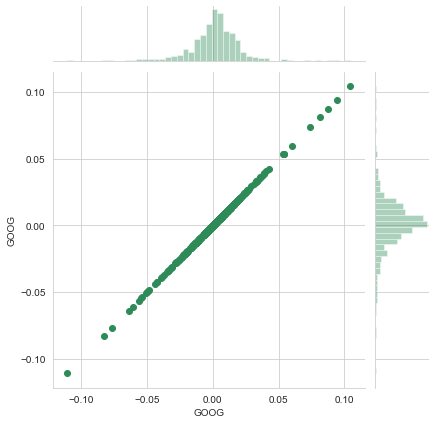

In [150]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

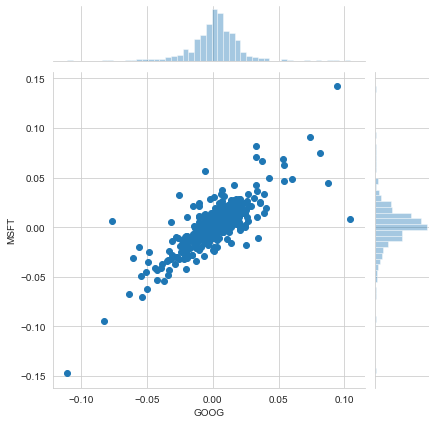

In [151]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

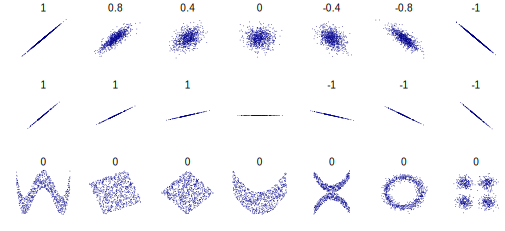

In [152]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

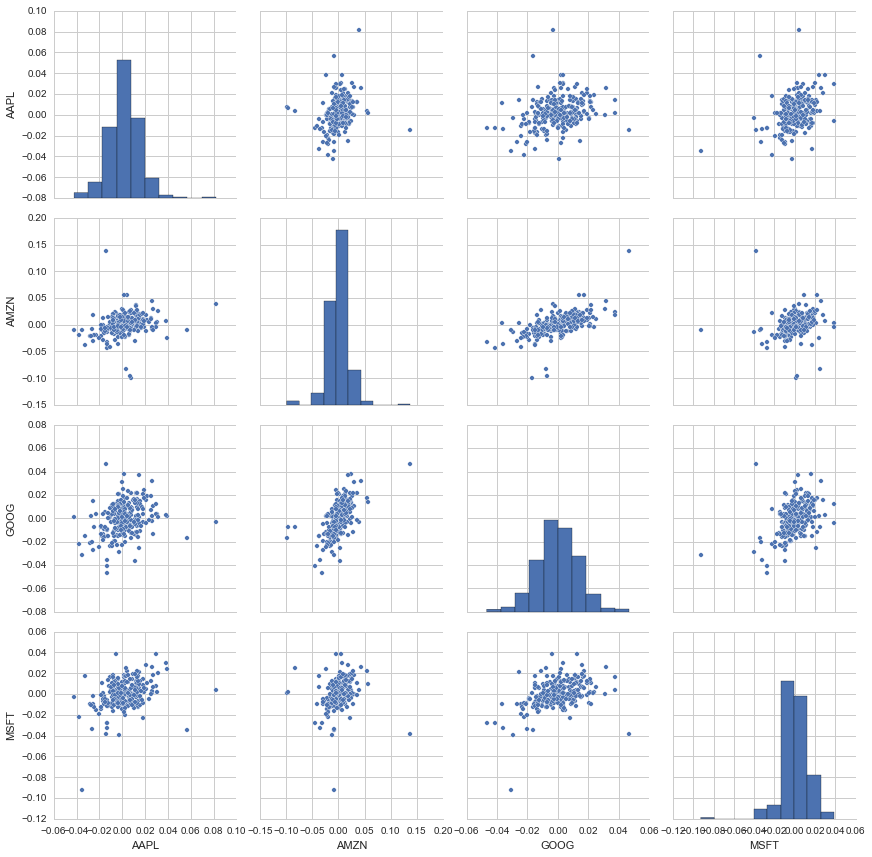

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

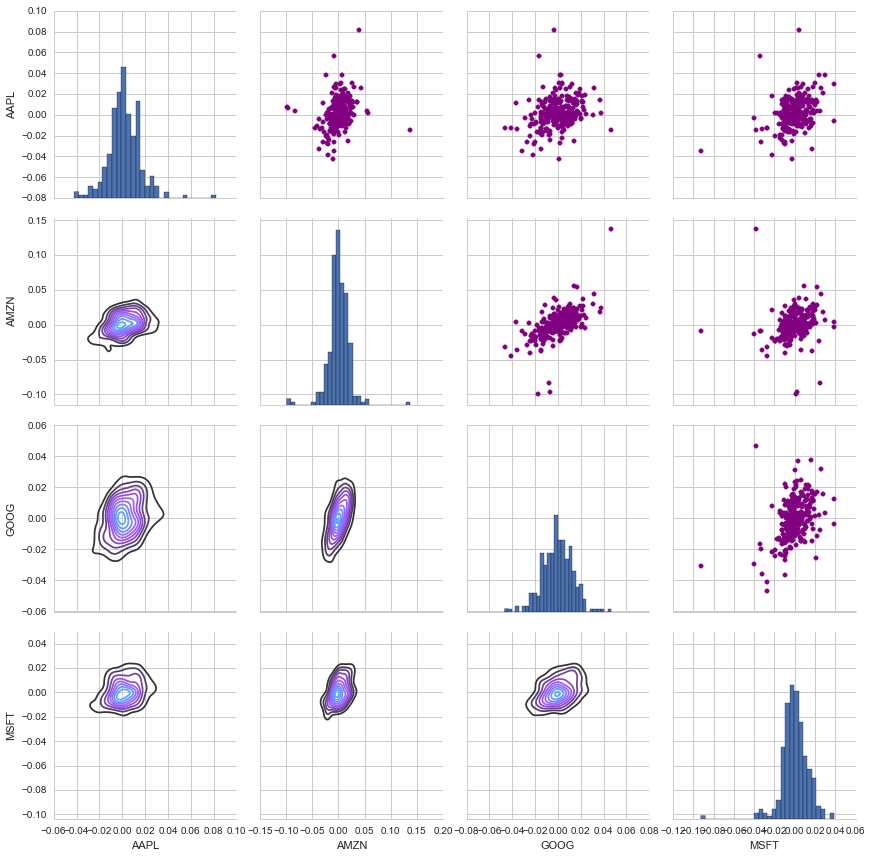

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

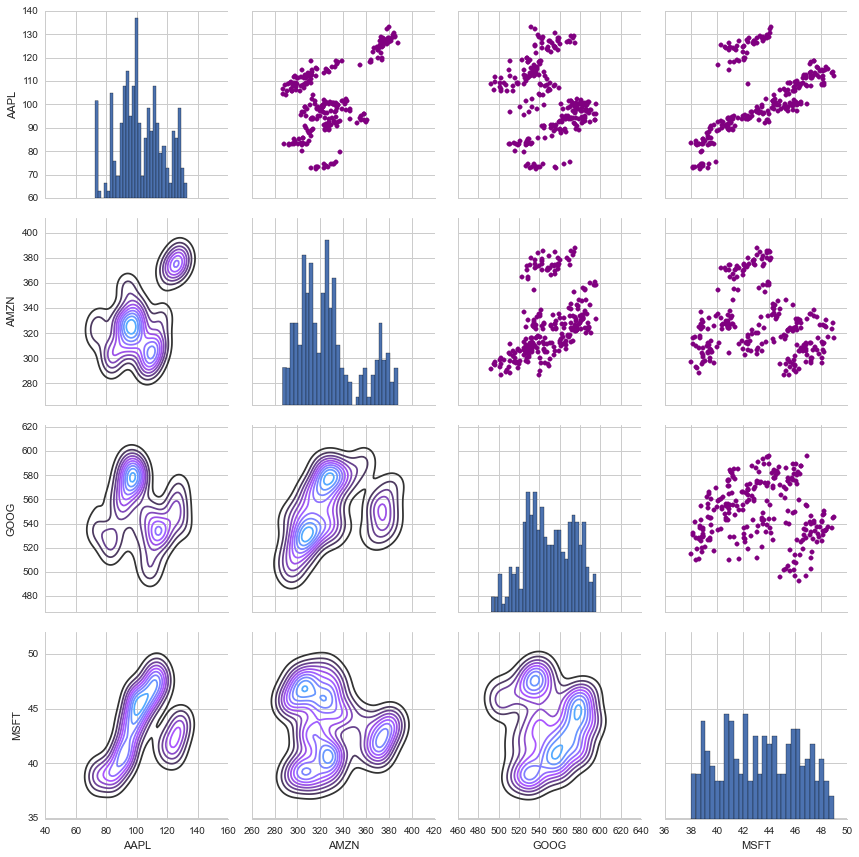

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

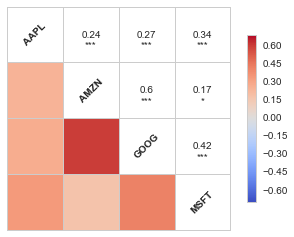

In [21]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.corrplot(tech_rets.dropna(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

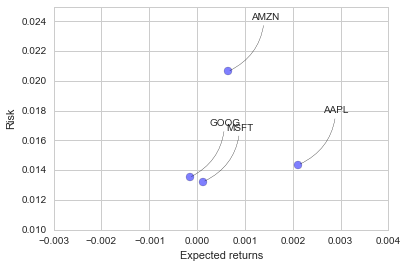

In [153]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

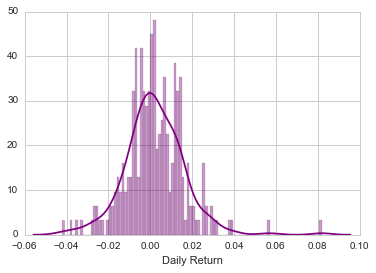

In [156]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now we can use quantile to get the risk value for the stock.

In [159]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.019003328976079148

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [131]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [132]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Grate now let's put our function to work!

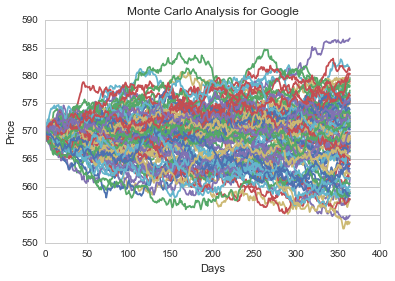

In [133]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [139]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

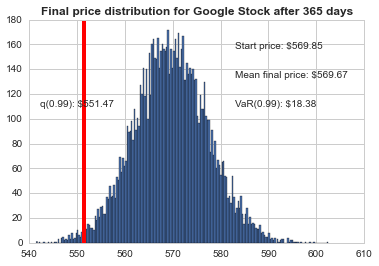

In [152]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

# Great job!